In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt

In [ ]:
iris = datasets.load_iris()


In [ ]:
X = iris["data"]
Y = iris["target"]

In [ ]:
names_features = iris["feature_names"]
names_target = iris["target_names"]
df = pd.DataFrame(X, columns=names_features)


In [ ]:
#Pascal representacion
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

In [ ]:
#Se agregar el target al df
df.columns=cols
df["Target"]=Y

In [ ]:
#Creacion del conjunto de entrenamiento y conjunto de prueba
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
df_train = strat_train_set
df_test = strat_test_set

In [ ]:
#Seleccion de valores de y
# Tomemos dos cateogrias, "Sepal_length" y "Petal_length"
y_train = (df_train['Target'] == 0).astype(float)
X_train = df_train.iloc[:,[0,2]].values

In [ ]:
y_test = (df_test['Target'] == 0).astype(float)
X_test = df_test.iloc[:,[0,2]].values

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

1.0
1.0


In [ ]:
X_s = np.linspace(-10, 10, 1000)
Y_s = np.linspace(-10, 10, 1000)
x, y = np.meshgrid(X_s, Y_s)

In [ ]:
grid = np.c_[x.ravel(), y.ravel()]  # Combinar x e y en una matriz
prob = log_reg.predict_proba(grid)[:, 0] # Calcular probabilidades
prob = prob.reshape(x.shape)

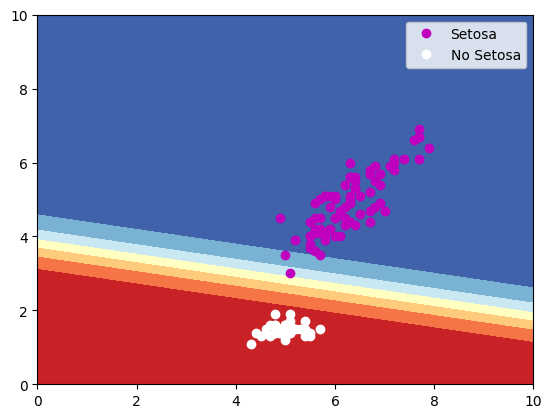

In [ ]:
plt.contourf(x, y, prob, cmap=plt.cm.RdYlBu)
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1],"mo",label = "Setosa")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1],"wo",label="No Setosa")
plt.xlim(0.0,10)
plt.ylim(0.0,10)
plt.legend()
plt.show()

In [ ]:
#Con la clase Setosa se obtuva una muy buena clasificacion con solo 2 caracteristicas, por lo tanto verifico si con Versicolor y 2 caracteristicas
#tambien se obtiene una buena clasificacion, esto es dado por el .score
y1_train = (df_train['Target'] == 1).astype(float)
X1_train = df_train.iloc[:,[0,2]].values

In [ ]:
y1_test = (df_test['Target'] == 1).astype(float)
X1_test = df_test.iloc[:,[0,2]].values

In [ ]:
log_reg1=LogisticRegression()
log_reg1.fit(X1_train,y1_train)

LogisticRegression()

In [ ]:
print(log_reg1.score(X1_train,y1_train))
print(log_reg1.score(X1_test,y1_test))

0.6
0.6666666666666666


Un Score de 0.6 para el conjunto de entrenamiento y prueba no es un buen resultado, por lo que descartare la clasificacion con solo 2 caracteristicas y procedere a usar las 4 caracteristicas

In [ ]:
y0_train = (df_train['Target'] == 0).astype(float)
X0_train = df_train.iloc[:,0:4].values

In [ ]:
y0_test = (df_test['Target'] == 0).astype(float)
X0_test = df_test.iloc[:,0:4].values

In [ ]:
log_reg0=LogisticRegression()
log_reg0.fit(X0_train,y0_train)

LogisticRegression()

In [ ]:
print(log_reg0.score(X0_train,y0_train))
print(log_reg0.score(X0_test,y0_test))

1.0
1.0


In [ ]:
#Entrenamiento para la versicolor
yv_train = (df_train['Target'] == 1).astype(float)
Xv_train = df_train.iloc[:,0:4].values

In [ ]:
yv_test = (df_test['Target'] == 1).astype(float)
Xv_test = df_test.iloc[:,0:4].values

In [ ]:
log_regv=LogisticRegression()
log_regv.fit(Xv_train,yv_train)

LogisticRegression()

In [ ]:
print(log_regv.score(Xv_train,yv_train))
print(log_regv.score(Xv_test,yv_test))

0.725
0.7


In [ ]:
#Entrenamiento para la virginica
y2_train = (df_train['Target'] == 2).astype(float)
X2_train = df_train.iloc[:,0:4].values


In [ ]:
y2_test = (df_test['Target'] == 2).astype(float)
X2_test = df_test.iloc[:,0:4].values

In [ ]:
log_reg2=LogisticRegression()
log_reg2.fit(X2_train,y2_train)

LogisticRegression()

In [ ]:
print(log_reg2.score(X2_train,y2_train))
print(log_reg2.score(X2_test,y2_test))

0.975
0.9666666666666667


In [ ]:
def IsSetosa(data):
  """Args: un array de numpy con 4 caracteristicas"""

  """ Return: La probabilidad de que sea setosa"""

  """Reshape data, para que sea compatible con predict_proba, en este caso un array de 1 fila
  y 4 columnas"""
  data_point=data.reshape(1,-1)
  """Los datos de setosa, fueron entrenados con log_reg0, hacemos prediciones con este clasificador
  y extraigo la probabilidad de que sea setosa el conjuto de datos "data" """
  proba= log_reg0.predict_proba(data_point)[0,0]

  return proba




In [ ]:
def IsVersicolor(data):
  """Args: un array de numpy con 4 caracteristicas"""

  """ Return: La probabilidad de que sea setosa"""

  """Reshape data, para que sea compatible con predict_proba, en este caso un array de 1 fila
  y 4 columnas"""
  data_point=data.reshape(1,-1)

  proba= log_regv.predict_proba(data_point)[0,0]

  return proba

In [ ]:
def IsVirginica(data):
  """Args: un array de numpy con 4 caracteristicas"""

  """ Return: La probabilidad de que sea setosa"""


  data_point=data.reshape(1,-1)

  proba= log_reg2.predict_proba(data_point)[0,0]

  return proba

In [ ]:
data=np.array([4.9,5.0, 1.8, 0.3])#Ejemplo

In [ ]:
s= IsSetosa(data)
ve=IsVersicolor(data)
vi=IsVirginica(data)

In [ ]:
print(f"The probability of being Setosa is: {s*100}")
print(f"The probability of being Versicolor is: {ve*100}")
print(f"The probability of being Virginica is: {vi*100}")

The probability of being Setosa is: 1.3563404016789349
The probability of being Versicolor is: 99.22472505960724
The probability of being Virginica is: 99.99927398931987


Como se puede ver la probabilidad de que sea versicolor y virginica es casi la misma, pero yo confiaria en que es Virginica, esto por el score de la regresion logistica de cada modelo, se obtuva un score de 0.7 para el model de la versicolor mientras que se obtuvo 0.9 para el modelo de la clasificacion de la virginica, este ultimo es mas confiable, sin embargo no es determinante, habria que realizar este mismo proceso con otros modelos d clasificacion.

